#  Business Problem Understanding

TokoHijau a leading e-commerce company, faces high customer churn rates, impacting revenue and growth. To mitigate this, understanding churn drivers and predicting at-risk customers is crucial. With targeted retention strategies, TokoHijau can boost loyalty and safeguard its revenue.

# Problem Statement

E-commerce must predict customer churn to reduce revenue loss by targeting the right customers with effective promotions. This ensures better service, retains customers, and minimizes potential losses.

# Goals

- Develop predictive models that can identify customers who are likely to churn before they actually leave the service.

- Optimize promotional strategies by ensuring that promotions are only given to customers who have a high probability of using them.

# Metric Evaluation 

- True Positive: The model predicts that customers will churn and the result is churn
- False Positive: The model predicts that customers will churn, but in reality they do not churn
- False Negative: The model predicts that customers will not churn, but in reality they do churn
- True Negative: The model predicts that customers will not churn and the result is not churn

Here is an analysis of the prediction errors :

False Positive:
- Promotions are given to customers who do not actually need promotions. This can result in decreased profits from the product.

False Negative:
- Customers who should get promotions or special attention do not receive them, and this can have a negative impact because they may actually leave the service which means no profit from the customer.

# Data set Understanding

This dataset presents information that can be used to analyze customer churn behavior and identify factors that influence their decision to unsubscribe. Here is a summary of the information in this dataset:

1. Customer Demographic Information (Dependents): This data provides insight into the customer's personality, which may affect the stability of their membership in the service. For example, the features `Warehouse To Home` and `Marital Status`
2. Customer Application Usage: The dataset includes information about how customers use the application, such as: `Tenure`, `Number of Device Registered`, `Prefer Order Cat`, `Number Of Address`, `Day Since Last Order`, and `Cashbak Amount`.
3. Customer Satisfaction: This data includes customer ratings `Satisfaction Score` and complaints from customers `Complain`.
4. Customer Churn Status: The critical column in the dataset is the `Churn` column, which indicates whether a customer has churn from the application. Analysis of this column will help in understanding the customer churn pattern and identifying factors related to their decision to leave the service.



| Feature                   | Description                                                   |
|---------------------------|---------------------------------------------------------------|
| **Tenure**                | Tenure of a customer in the company.                          |
| **WarehouseToHome**       | Distance between the warehouse to the customer’s home.        |
| **NumberOfDeviceRegistered** | Total number of devices registered on a particular customer. |
| **PreferedOrderCat**      | Preferred order category of a customer in the last month.     |
| **SatisfactionScore**     | Satisfactory score of a customer on service.                  |
| **MaritalStatus**         | Marital status of a customer.                                 |
| **NumberOfAddress**       | Total number of addresses added by a particular customer.     |
| **Complaint**             | Any complaint raised in the last month.                       |
| **DaySinceLastOrder**     | Days since the last order by the customer.                    |
| **CashbackAmount**        | Average cashback in the last month.                           |
| **Churn**                 | Churn flag.                                                   |


# Import Library

In [317]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle
import xgboost as xgb

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


# Load dataset

In [276]:

data = pd.read_csv('data_ecommerce_customer_churn.csv')
data



,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


There is 3941 row and 11 columns

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [278]:
data.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


**Explanation Data in One Row**

In [279]:
data.loc[0]

Tenure                                    15.0
WarehouseToHome                           29.0
NumberOfDeviceRegistered                     4
PreferedOrderCat            Laptop & Accessory
SatisfactionScore                            3
MaritalStatus                           Single
NumberOfAddress                              2
Complain                                     0
DaySinceLastOrder                          7.0
CashbackAmount                          143.32
Churn                                        0
Name: 0, dtype: object

- Tenure (15): Customer subscribed for 15 months
- WarehouseToHome (29): 29 miles from the warehouse to the customer's home
- NumberOfDeviceRegistered (4): 4 devices that the customer registered for their account
- PreferedOrderCat (Laptop & Accessory): In the last month, the customer chose to buy a Laptop & Accessory
- SatisfactionScore (3): Customer gave a 3 out of 5 rating for their satisfaction using the service
- MaritalStatus (Single): Customer is single
- NumberOfAddress (2): Customer registered 2 addresses on their account
- Complaint (0): Customer did not complain
- DaySinceLastOrder (7): Customer's last purchase was 7 days ago
- CashbackAmount (143.32): Customer received an average cashback of $143.32 this month
- Churn (0): Customer is not predicted to churn

# Data Cleaning

In [280]:
# check missing value total and presentage
total_missing = data.isnull().sum()
total_missing  

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [281]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing 

Tenure                      4.922608
WarehouseToHome             4.288252
NumberOfDeviceRegistered    0.000000
PreferedOrderCat            0.000000
SatisfactionScore           0.000000
MaritalStatus               0.000000
NumberOfAddress             0.000000
Complain                    0.000000
DaySinceLastOrder           5.404720
CashbackAmount              0.000000
Churn                       0.000000
dtype: float64

In [282]:
# Fill missing values ith mean and median
data.fillna({'Tenure':round(data.Tenure.mean()), 
           'WarehouseToHome':round(data.WarehouseToHome.mean()),  
           'DaySinceLastOrder':data.DaySinceLastOrder.median()}, inplace=True)

In [283]:
# Detect and remove duplicate rows
print("Number of duplicate rows:", data.duplicated().sum())
data = data.drop_duplicates()
print("Number of rows after removing duplicates:", data.shape[0])

Number of duplicate rows: 672
Number of rows after removing duplicates: 3269


In [284]:
data.shape

(3269, 11)

In [285]:
# Replace value in PreferedOrderCat mobile to mobile phone
data['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone           725
Fashion                484
Mobile                 458
Grocery                240
Others                 149
Name: count, dtype: int64

There is 2 simillar categori, mobile and mobile phone. In this case, all value with mobile will replace with mobile phone

In [286]:
data.loc[data['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat'] = 'Mobile Phone'


In [287]:
print('After replace')
data['PreferedOrderCat'].value_counts()

After replace


PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone          1183
Fashion                484
Grocery                240
Others                 149
Name: count, dtype: int64

# EDA

In [288]:
data['Churn'].value_counts()

Churn
0    2735
1     534
Name: count, dtype: int64

The result is imbalance

# Categorical Features

**Barplot churn and no churn ration in categorical data**

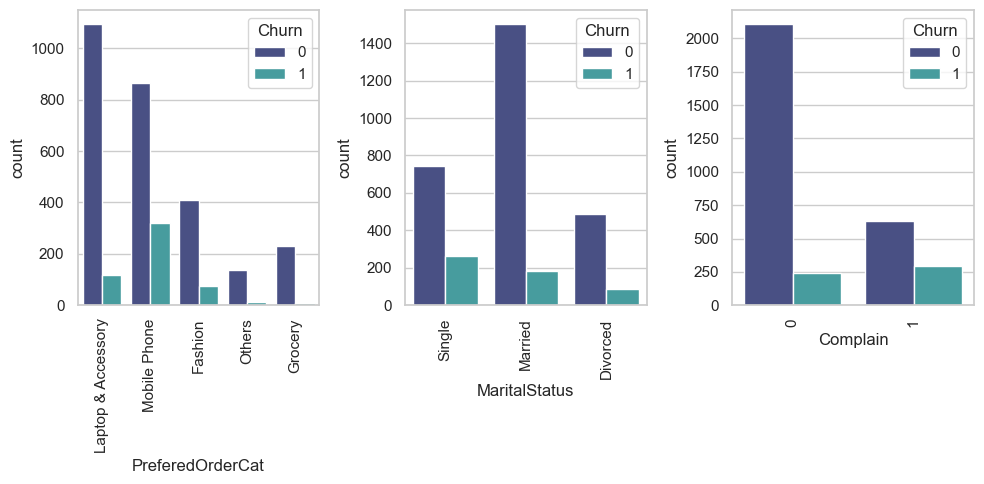

In [289]:

# list of categorical variables
cat_vars = ['PreferedOrderCat','MaritalStatus', 'Complain']


fig, axs = plt.subplots(ncols=3, figsize=(10,5))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Churn', data=data, ax=axs[i], palette='mako')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)


fig.tight_layout()


plt.show()

**Stacking barplot for categorical**

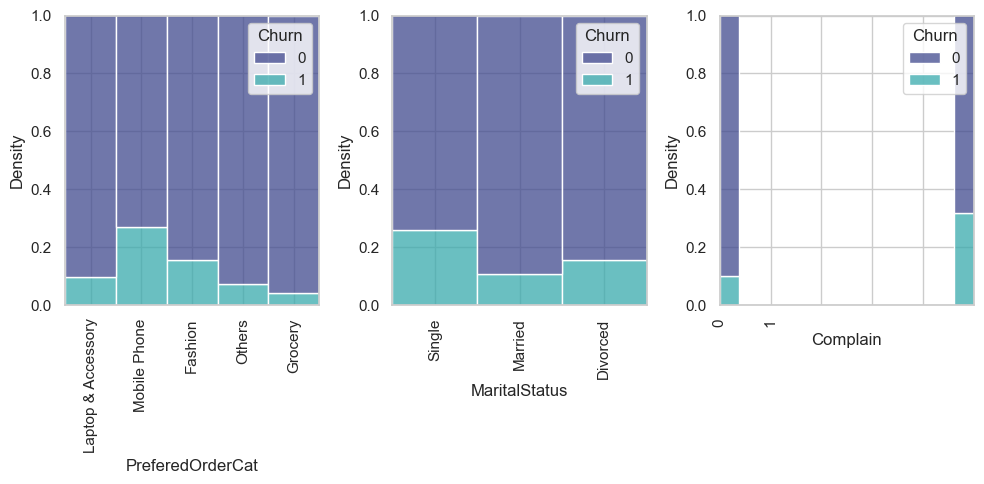

In [290]:
cat_vars = ['PreferedOrderCat','MaritalStatus', 'Complain']

fig, axs = plt.subplots(ncols=3, figsize=(10,5))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Churn', data=data, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density', palette='mako')
    axs[i].set_xticklabels(data[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
fig.tight_layout()


plt.show()


- Churn Distribution:
The data shows that non-churning customers significantly outnumber those who churn.

- Preferred Order Category:
Customers purchasing Mobile Phones are more likely to churn compared to other categories. This may be due to the nature of mobile phone purchases, which involve longer product lifespans, higher costs, slower trend changes, and different consumer behaviors. In contrast, other categories, like Laptop & Accessories, may include items with faster turnover or different consumer dynamics, though we lack specific details about the "Accessory" subcategory.

- Marital Status:
Single customers are more prone to churn compared to those who are Married or Divorced. Assuming singles are generally younger, they may be more tech-savvy, energetic, and inclined to explore or switch between apps more frequently.

- Complaints:
Customers who have filed complaints are more likely to churn, likely due to dissatisfaction with the app or services, as highlighted in the business metrics. Complaints often signal underlying issues that drive customer dissatisfaction.

**PreferedOrderCat**

In [291]:
data['PreferedOrderCat'].value_counts().reset_index()

,PreferedOrderCat,count
0,Laptop & Accessory,1213
1,Mobile Phone,1183
2,Fashion,484
3,Grocery,240
4,Others,149


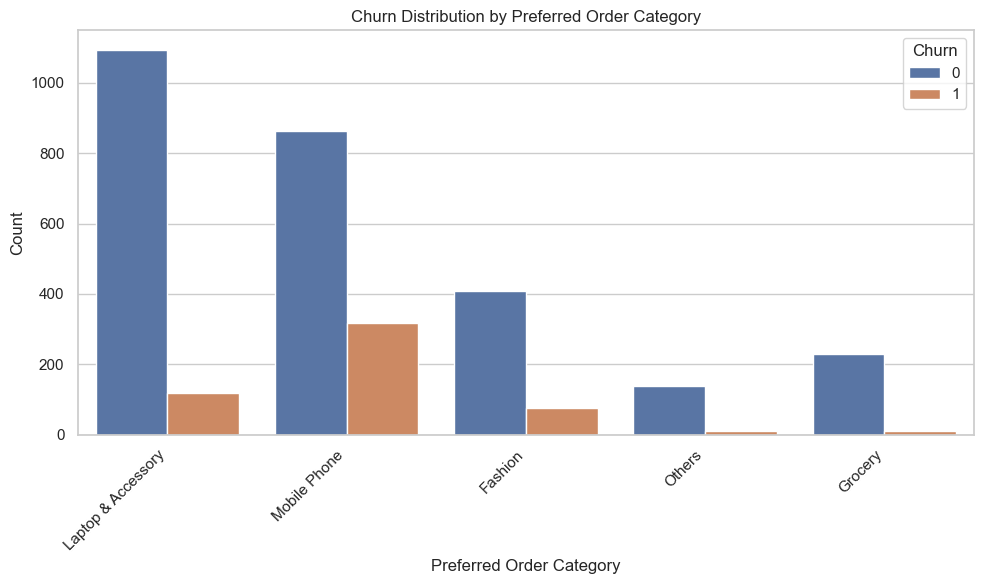

In [292]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.countplot(data=data, x='PreferedOrderCat', hue='Churn')
plt.title('Churn Distribution by Preferred Order Category')
plt.xlabel('Preferred Order Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

**Marital Status**

In [293]:
# # maritalstatus of customer

# plot_histogram(data, 'MaritalStatus')

In [294]:
data['MaritalStatus'].value_counts().reset_index()

,MaritalStatus,count
0,Married,1686
1,Single,1007
2,Divorced,576


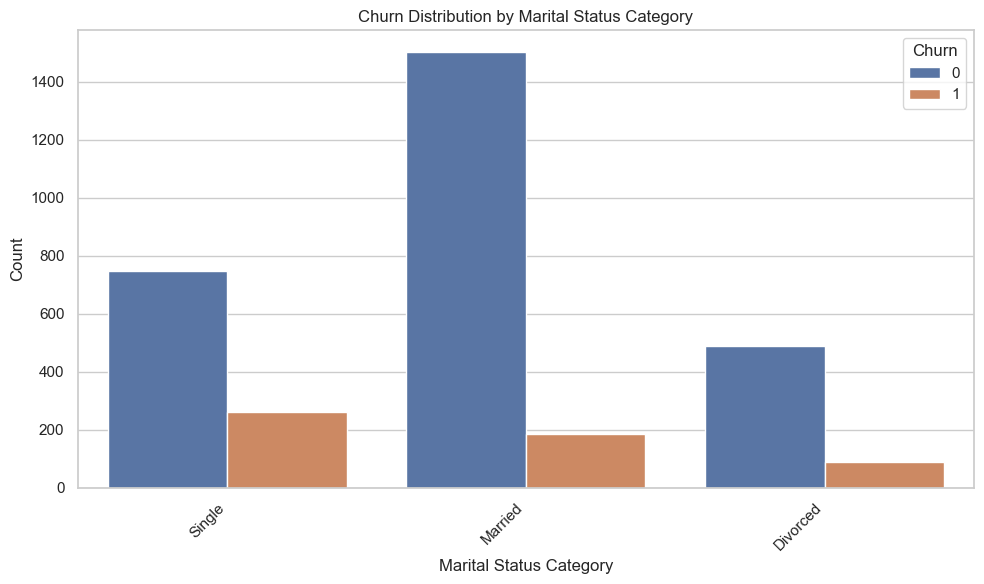

In [295]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.countplot(data=data, x='MaritalStatus', hue='Churn')
plt.title('Churn Distribution by Marital Status Category')
plt.xlabel('Marital Status Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

# Numerical Features

**Numerical data distribution**

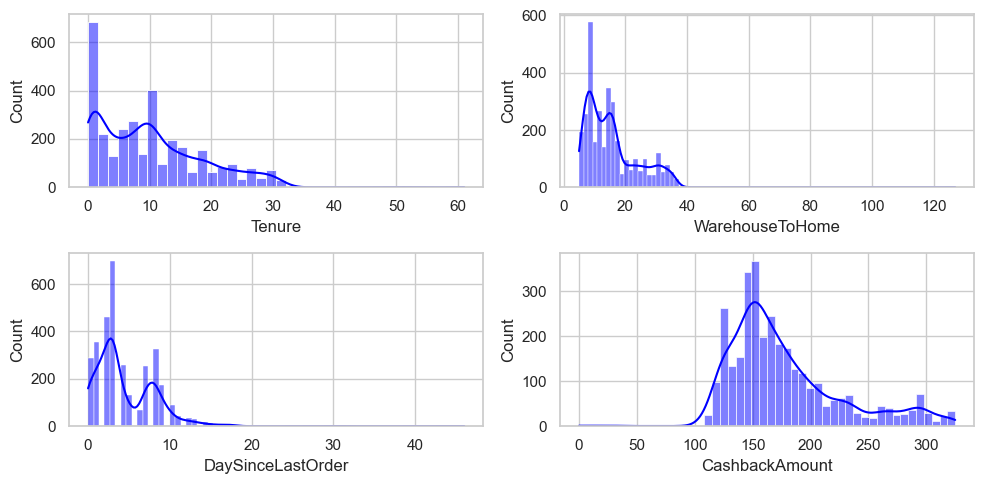

In [296]:
num_vars = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=data, ax=axs[i], color='blue', kde=True)

fig.tight_layout()
plt.show()

# Define Features and Target

In [297]:
# Identify features and target
categorical_features = ['PreferedOrderCat', 'MaritalStatus']
numerical_features = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
                      'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']
target = 'Churn'



In [298]:
# Split data into train and test sets
X = data[categorical_features + numerical_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Data Preprocessing

Preprocessing is a crucial step in model formulation, and one of the techniques used is **Resampling**, which adjusts the class distribution in a dataset, especially when dealing with imbalanced target classes. The two main types of resampling are **OverSampling** and **UnderSampling**. Given the imbalance in the dataset, both resampling methods will be applied and evaluated to determine which one improves model performance.

Another key component is **Feature Engineering**, which involves creating, modifying, or manipulating features to enhance model performance. Some feature engineering techniques include feature selection, filling missing data, encoding categorical variables, scaling, and polynomial features. In this case, we will focus on filling missing data, encoding categorical variables, and scaling data, as the dataset already contains sufficient features, and polynomial features are unnecessary.

1. **Handling Missing Data**:  
   - The dataset has three columns with missing values: **'Tenure', 'WarehouseToHome', 'DaySinceLastOrder'**.  
   - Various methods exist for handling missing data. Since the distributions of these columns are non-normal, we will use **Simple Imputer** and fill missing values with the **Median**.
   
2. **Categorical Encoding (Categorical -> Numerical)**:  
   - Encoding is essential because machine learning models require numerical inputs, and cannot learn from categorical variables in string form.  
   - In this dataset, there are two categorical columns: **'PreferedOrderCat'** and **'MaritalStatus'**.  
   - Given that these variables are not ordinal and have relatively few unique values, we will use **OneHotEncoder** to convert them into numerical format.


In [299]:
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)


In [300]:
data.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


# Modeling

In [301]:
# Initialize models
decision_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

xgboost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])



In [302]:
# Evaluate initial models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }

initial_results = {
    'Decision Tree': evaluate_model(decision_tree_model, X_train, X_test, y_train, y_test),
    'Random Forest': evaluate_model(random_forest_model, X_train, X_test, y_train, y_test),
    'XGBoost': evaluate_model(xgboost_model, X_train, X_test, y_train, y_test)
}



In [303]:
# Print initial results
for name, result in initial_results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])



Model: Decision Tree
Accuracy: 0.8501529051987767
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       547
           1       0.53      0.64      0.58       107

    accuracy                           0.85       654
   macro avg       0.73      0.77      0.75       654
weighted avg       0.86      0.85      0.86       654

Model: Random Forest
Accuracy: 0.882262996941896
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       547
           1       0.69      0.51      0.59       107

    accuracy                           0.88       654
   macro avg       0.80      0.73      0.76       654
weighted avg       0.87      0.88      0.88       654

Model: XGBoost
Accuracy: 0.9036697247706422
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       547
           1       0.72  

# Hyperparameter Tuning

In [304]:
# Hyperparameter tuning for RandomForest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}



In [305]:
# Perform GridSearchCV for RandomForest
grid_search_rf = GridSearchCV(random_forest_model, param_grid_rf, cv=3, scoring='recall')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='recall')

In [306]:
# Perform GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgboost_model, param_grid_xgb, cv=3, scoring='recall')
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus'])])),
                                       ('classifier',
                                        XGBClassifie...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 6, 10],
                         'classifier__n_estimators': [100, 200]},
             scoring='recall')

In [307]:
# Evaluate the best models
best_rf_model = grid_search_rf.best_estimator_
best_xgb_model = grid_search_xgb.best_estimator_

rf_y_pred = best_rf_model.predict(X_test)
xgb_y_pred = best_xgb_model.predict(X_test)

rf_results = {
    'accuracy': accuracy_score(y_test, rf_y_pred),
    'classification_report': classification_report(y_test, rf_y_pred, output_dict=True)
}

xgb_results = {
    'accuracy': accuracy_score(y_test, xgb_y_pred),
    'classification_report': classification_report(y_test, xgb_y_pred, output_dict=True)
}


# Print tuned results
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Accuracy:", rf_results['accuracy'])
print("Random Forest Classification Report:")
print(rf_results['classification_report'])

print("XGBoost Best Parameters:", grid_search_xgb.best_params_)
print("XGBoost Accuracy:", xgb_results['accuracy'])
print("XGBoost Classification Report:")
print(xgb_results['classification_report'])


Random Forest Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Random Forest Accuracy: 0.8868501529051988
Random Forest Classification Report:
{'0': {'precision': 0.9141856392294221, 'recall': 0.9542961608775137, 'f1-score': 0.9338103756708408, 'support': 547}, '1': {'precision': 0.6987951807228916, 'recall': 0.5420560747663551, 'f1-score': 0.6105263157894736, 'support': 107}, 'accuracy': 0.8868501529051988, 'macro avg': {'precision': 0.8064904099761568, 'recall': 0.7481761178219344, 'f1-score': 0.7721683457301571, 'support': 654}, 'weighted avg': {'precision': 0.8789459158957849, 'recall': 0.8868501529051988, 'f1-score': 0.8809183352926966, 'support': 654}}
XGBoost Best Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 6, 'classifier__n_estimators': 200}
XGBoost Accuracy: 0.9021406727828746
XGBoost Classification Report:
{'0': {'precision': 0.9351351351351351, 'recall': 0.9488117001828154, 'f1-sco

# Second Tuning

In [308]:
# Advanced hyperparameter tuning for XGBoost
param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 6, 10],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgboost_model, param_grid_xgb, cv=5, scoring='accuracy', verbose=1)
grid_search_xgb.fit(X_train, y_train)



Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus'])])),
                                       ('classifier',
                                        XGBClassifie...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'classifier__colsample_bytree': [0.8, 1.0],
                         'classifier__learning_rate': [0.01, 0.05, 0.1],
                         'classifier__max_depth': [3, 6, 10],
                         'classifier__n_estimators': [100, 200, 300],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [309]:
# Evaluate the tuned XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_
tuned_y_pred = best_xgb_model.predict(X_test)

tuned_results = {
    'accuracy': accuracy_score(y_test, tuned_y_pred),
    'classification_report': classification_report(y_test, tuned_y_pred, output_dict=False)
}

In [310]:

print("accuracy: ", tuned_results['accuracy'])

print("Classification report:\n", tuned_results['classification_report'])


accuracy:  0.9067278287461774
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       547
           1       0.73      0.67      0.70       107

    accuracy                           0.91       654
   macro avg       0.84      0.81      0.82       654
weighted avg       0.90      0.91      0.91       654



Karna hasil tuning kedua recall belum cukup untuk prediksi false negatif maka dilakukan threshold

In [311]:
from sklearn.metrics import accuracy_score, classification_report, recall_score

In [312]:
tuned_y_prob = best_xgb_model.predict_proba(X_test)[:, 1]

threshold = 0.3
tuned_y_pred_adjusted = (tuned_y_prob > threshold).astype(int)

# re evaluate
print("Recall with threshold 0.3: ", recall_score(y_test, tuned_y_pred_adjusted))

print("classification_report with Threshold 0.3:\n", classification_report(y_test, tuned_y_pred_adjusted))

Recall with threshold 0.3:  0.7476635514018691
classification_report with Threshold 0.3:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       547
           1       0.66      0.75      0.70       107

    accuracy                           0.89       654
   macro avg       0.80      0.84      0.82       654
weighted avg       0.90      0.89      0.90       654



The recall with a threshold of 0.3 is 0.75, which indicates that 75% of the actual positive cases (label 1) were correctly identified. The classification report shows that the model performs well with a high precision (0.95) and recall (0.92) for class 0, which represents the negative class. However, for class 1 (the positive class), the precision is lower (0.66), meaning more false positives, but the recall is higher (0.75), meaning more true positives are identified. The overall accuracy is 89%, and the macro and weighted averages show balanced performance across both classes.

# Feature Importance

In [314]:
# Extract the trained XGBoost model from the pipeline
xgb_model = best_xgb_model.named_steps['classifier']

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature importances:")
print(feature_importances)


Feature importances:
                                     Feature  Importance
0                                num__Tenure    0.211653
7              cat__PreferedOrderCat_Grocery    0.161504
9         cat__PreferedOrderCat_Mobile Phone    0.093346
10              cat__PreferedOrderCat_Others    0.081785
12                 cat__MaritalStatus_Single    0.064216
8   cat__PreferedOrderCat_Laptop & Accessory    0.056497
5                     num__DaySinceLastOrder    0.054895
4                       num__NumberOfAddress    0.054885
6                        num__CashbackAmount    0.048361
2              num__NumberOfDeviceRegistered    0.047314
3                     num__SatisfactionScore    0.046989
1                       num__WarehouseToHome    0.044861
11                cat__MaritalStatus_Married    0.033694


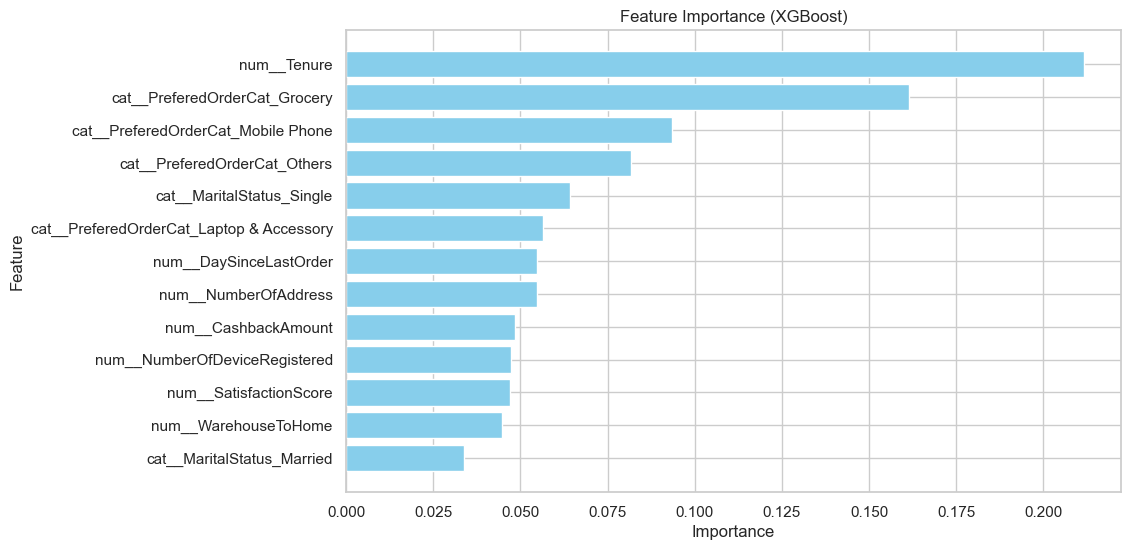

In [315]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


From the data above, it can be seen which factors influence the potential for customer churn and the machine learning model. The most important feature is tenure, then preferredordercat for grocery. Analysis can be improved by performing feature selection or a combination of influential features to reduce model complexity and compared to the current best model. 

In addition, these factors can also be an insight for business, where companies must pay attention to tenure or the length of someone's subscription. and see what purchase categories are most popular. In addition, companies can increase customer retention by providing attractive ongoing promotions, such as if there is a subscription.

# Final Model

#### Export model

In [319]:
import pickle

# Save the best tuned XGBoost model
model_filename = 'xgboost_customer_churn_tuned.sav'
with open(model_filename, 'wb') as file:
    pickle.dump(best_xgb_model, file)

print(f"Model saved to {model_filename}")


Model saved to xgboost_customer_churn_tuned.sav


# Conclusion

Based on the model evaluation results, the XGBoost model achieved an accuracy of 89% in predicting customer churn. The precision and recall for non-churning customers (class 0) were 0.95 and 0.92, respectively, indicating that the model is highly effective in identifying customers who are not likely to churn. For churning customers (class 1), the model achieved a precision of 0.66 and recall of 0.75, demonstrating good performance with room for improvement. Overall, the model provides solid results with an average F1-score of 0.82 and can be used to support customer retention strategies.

# Recomendation 

**Business Recommendations:**
- Offer promotions, cashback, or subscriptions to customers with a tenure of 0-2 months at risk of churning, encouraging continued use of the platform.
- Provide shipping discounts to potential churn customers with long distances between warehouses and homes.
- Use the trained machine learning model to guide targeted marketing strategies.

**Model Recommendations:**
- Ensure data includes a customer ID column to prevent duplicates and missing values.
- Include features related to service quality and transaction details, such as delivery time, on-time performance, and customer service ratings.
- Improve model performance by tuning hyperparameters and experimenting with additional parameters.
- Increase recall by adjusting the ROC-AUC threshold.
- Optimize the model by selecting important features and experimenting with feature combinations to reduce complexity.